In [1]:
import pandas as pd
import numpy as np
from numpy import mean, std, median
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,  train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, make_scorer, classification_report, recall_score,r2_score, accuracy_score, cohen_kappa_score, classification_report, confusion_matrix, precision_score,f1_score 
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, KFold, StratifiedKFold 
from imblearn.pipeline import Pipeline 
from imblearn.pipeline import make_pipeline as imbpipeline
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE, ADASYN
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import triplify 

In [2]:
#Random seed used in R was 7
random_seed=7

In [3]:
#read input data
train_data=pd.read_csv('training_data_final.csv')
test_data=pd.read_csv('test_data_final.csv')

In [4]:
#set features and target variable 
features=[ 
    'ngrams_last_mean',
    'minwordlength',
 'nroflemmas',
    'polyscore_max',
    'nrpartrels_normalised',
    'nrhypos',
    'glosslength_normalised',
    'depthfromtopsynset_normalised',
    'nrdirhypers',
    'CHILDES_Sum_Rel',
    'BNC_Sum', 
 ]
target=['vote']

In [5]:
X_train=np.array(train_data[features])
y_train= np.array(train_data[target])
test_set=np.array(test_data[features])

In [6]:
#run SMOTE algorithm to deal with class imbalances - make basic class same amount as non-basic
sm = SMOTE(random_state=random_seed, k_neighbors=2)
X_train, y_train = sm.fit_resample(X_train, y_train)
print ('Shape of oversampled data: {}'.format(X_train.shape))
print ('Shape of Y: {}'.format(y_train.shape))

Shape of oversampled data: (1384, 11)
Shape of Y: (1384,)


In [7]:
#define model and fit oversampled training sets
rf = RandomForestClassifier(random_state=random_seed, max_features='sqrt', n_estimators=1400, oob_score=True, criterion='gini', bootstrap=True).fit(X_train, y_train.ravel())

In [8]:
y_pred = rf.predict(test_set)

In [9]:
print(y_pred)

['nb' 'nb' 'nb' ... 'nb' 'nb' 'nb']


In [10]:
results=pd.read_csv('results_syns_list.csv')

In [11]:
len(results)

74374

In [12]:
res=pd.DataFrame(y_pred)

In [14]:
res

,0
0,nb
1,nb
2,nb
3,nb
4,nb
...,...
74369,nb
74370,nb
74371,nb
74372,nb


In [16]:
results['Predicted']=res[0]

In [17]:
results

,Unnamed: 0,Synset,Name,Predicted
0,0,Synset('abstraction.n.06'),abstraction.n.06,nb
1,1,Synset('physical_entity.n.01'),physical_entity.n.01,nb
2,2,Synset('thing.n.08'),thing.n.08,nb
3,3,Synset('attribute.n.02'),attribute.n.02,nb
4,4,Synset('communication.n.02'),communication.n.02,nb
...,...,...,...,...
74369,74369,Synset('milking_shorthorn.n.01'),milking_shorthorn.n.01,nb
74370,74370,Synset('gaur.n.01'),gaur.n.01,nb
74371,74371,Synset('gayal.n.01'),gayal.n.01,nb
74372,74372,Synset('bucking_bronco.n.01'),bucking_bronco.n.01,nb


In [19]:
results.to_csv('final/predicted_results.csv')

In [20]:
basic=results[results['Predicted']=='b']

In [21]:
basic

,Unnamed: 0,Synset,Name,Predicted
34,34,Synset('personality.n.01'),personality.n.01,b
80,80,Synset('rare_earth.n.01'),rare_earth.n.01,b
86,86,Synset('swarm.n.02'),swarm.n.02,b
107,107,Synset('volume.n.01'),volume.n.01,b
138,138,Synset('diagonal.n.04'),diagonal.n.04,b
...,...,...,...,...
74098,74098,Synset('ox.n.02'),ox.n.02,b
74104,74104,Synset('chamois.n.02'),chamois.n.02,b
74297,74297,Synset('beef.n.01'),beef.n.01,b
74298,74298,Synset('bull.n.01'),bull.n.01,b


In [2]:
basic.to_csv('final/predicted_basic_level.csv')

NameError: name 'basic' is not defined

Feature: 0, Score: 0.07981
Feature: 1, Score: 0.06709
Feature: 2, Score: 0.04377
Feature: 3, Score: 0.07728
Feature: 4, Score: 0.12027
Feature: 5, Score: 0.06733
Feature: 6, Score: 0.09813
Feature: 7, Score: 0.27990
Feature: 8, Score: 0.01334
Feature: 9, Score: 0.05960
Feature: 10, Score: 0.09348


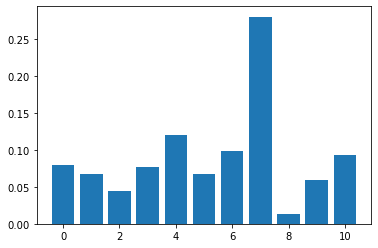

In [23]:
# get feature importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig1=plt.figure()
a=plt.bar([x for x in range(len(importance))], importance)
#plt.savefig('ck/feature_importance_global.png')
plt.show()

In [24]:
imp=[]
for i,v in enumerate(importance):
    imp.append(v)

In [25]:
df4=pd.DataFrame(imp)
df4['Features']=features
df4=df4.rename(columns={0:'Importance'})

In [26]:
df5=df4[['Features', 'Importance']].sort_values('Importance',ascending=False)

In [27]:
df5

,Features,Importance
7,depthfromtopsynset_normalised,0.279897
4,nrpartrels_normalised,0.120267
6,glosslength_normalised,0.098133
10,BNC_Sum,0.093479
0,ngrams_last_mean,0.079805
3,polyscore_max,0.077276
5,nrhypos,0.067334
1,minwordlength,0.067095
9,CHILDES_Sum_Rel,0.059601
2,nroflemmas,0.043772


In [28]:
df5.to_csv('final/FI_predict_entity.csv')

In [29]:
res.to_csv('final/y_pred_results.csv')

In [3]:
b=pd.read_csv('final/predicted_basic_level.csv')

In [8]:
basic_syns=pd.DataFrame()

In [9]:
basic_syns['Synset']=b['Synset']

In [12]:
basic_syns.to_csv('basiclevels.txt', header=None, index=None, sep='\n')

In [13]:
triplify.main()

@prefix wn30:  <http://purl.org/vocabularies/princeton/wn30/> .
@prefix cgraph: <http://purl.org/vocabularies/cgraph/> .


AttributeError: 'NoneType' object has no attribute 'groups'

## 